# Fertility_and_Education

Hypothesis: by delaying women from birth event will reduce the fertility rate
The trend seen in the boxplot is that once women is into higher education, the age of firt birt inceases drastically atleast by 25%

The logistic regression model predicts that with completing higher education women is likely to give birth after 19 years
with 58 percent precission with recall values 0.78 and F1 score as 0.67


Significance of the study is that, 15th Finacne Commission has allocated 15% of it grants to states on basis of TFR,(desired TFR is 2.1)
The states higher than TFR 2.1 have the possibility to reduce it by positive measures as keeping women in education



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyreadstat

# Overlook of TFR of various states

In [115]:
xls = pd.ExcelFile('Ci.xlsx')
df1 = pd.read_excel(xls, 'TFR_4')
df1 = df1.iloc[1: , :]
df1

,State_label,State_code,TFR,Unnamed: 3,State_l,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1,Chandigarh,6.0,1.57,NaN,Chand,NaN,NaN,NaN,andaman and nicobar islands,1.0
2,Delhi,25.0,1.78,NaN,Delhi,NaN,NaN,NaN,andhra pradesh,2.0
3,Haryana,12.0,2.05,NaN,Har,NaN,NaN,NaN,arunachal pradesh,3.0
4,Himachal Pradesh,13.0,1.88,NaN,H P,NaN,NaN,NaN,assam,4.0
5,Jammu & Kashmir,14.0,2.01,NaN,J & K,NaN,NaN,NaN,bihar,5.0
6,Punjab,28.0,1.62,NaN,Pun,NaN,NaN,NaN,chandigarh,6.0
7,Rajasthan,29.0,2.40,NaN,Raj,NaN,NaN,NaN,chhattisgarh,7.0
8,Uttarakhand,34.0,2.07,NaN,Uk,NaN,NaN,NaN,dadra and nagar haveli,8.0
9,Chhattisgarh,7.0,2.23,NaN,Chhat,NaN,NaN,NaN,daman and diu,9.0
10,Madhya Pradesh,19.0,2.32,NaN,M P,NaN,NaN,NaN,goa,10.0


In [117]:
x = list(df1['State_code'])
y = list(df1['TFR'])
label_1 = list(df1['State_label'])
lab_2 = list(df1['State_l'])

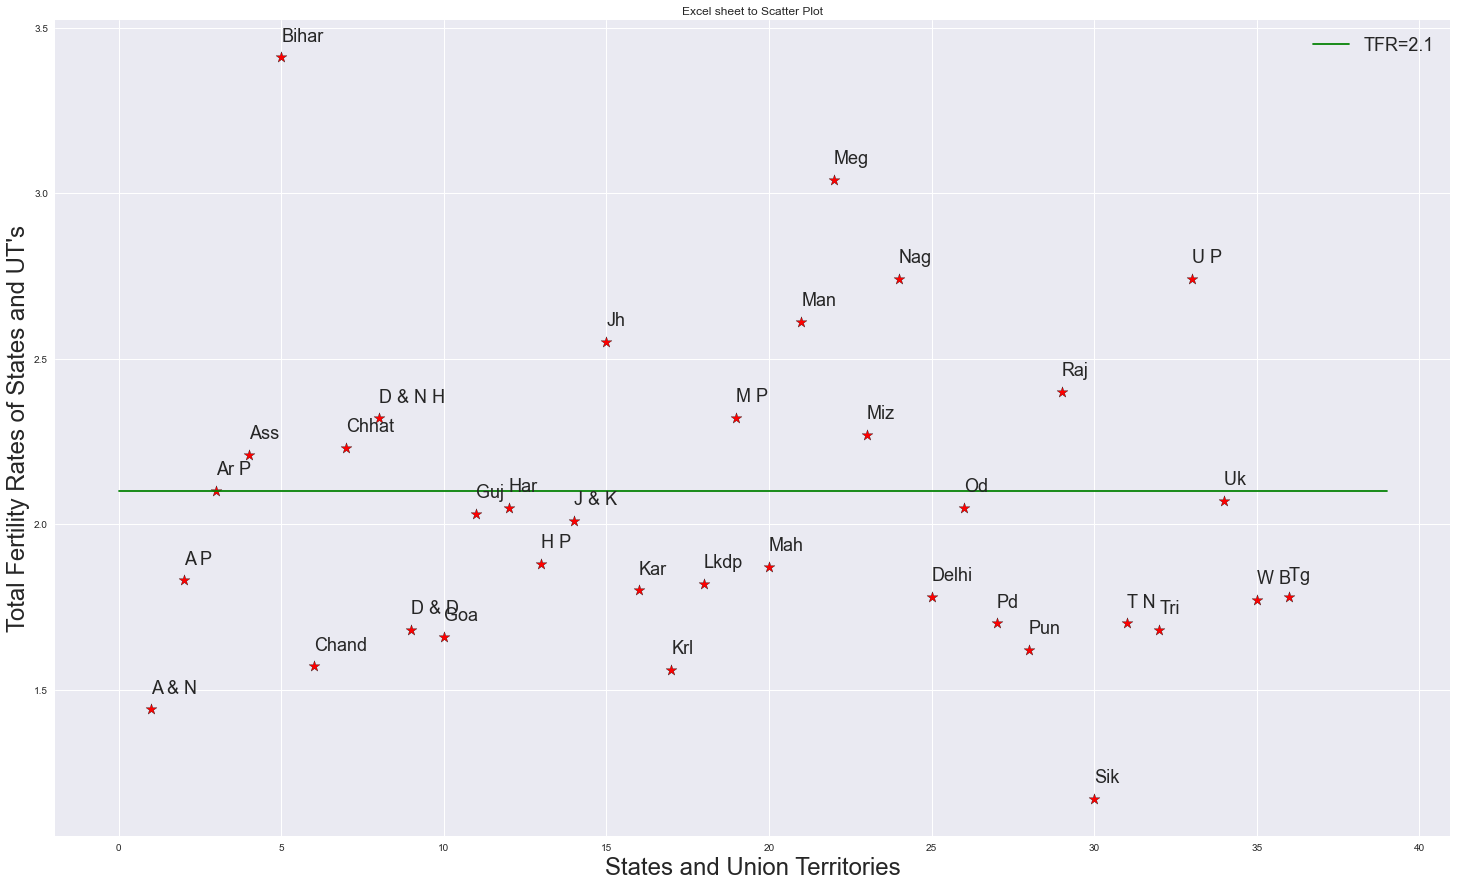

In [118]:
plt.figure(figsize=(25,15))
plt.style.use('seaborn')
plt.scatter(x,y,marker="*",s=130,edgecolors="black",c="red",)
plt.title("Excel sheet to Scatter Plot")

for i, label in enumerate(lab_2):
    plt.annotate(label, (x[i], y[i]+0.05), fontsize=18)
plt.xlabel("States and Union Territories", fontsize=24)
plt.ylabel("Total Fertility Rates of States and UT's", fontsize=24)
point1 = [0, 2.1]
point2 = [39, 2.1]

x_values = [point1[0], point2[0]]


y_values = [point1[1], point2[1]]



plt.plot(x_values, y_values,  '-g',label='TFR=2.1')

plt.legend(fontsize=18)
plt.show()


# Loading NFHS 4 data taken from IAIR74FL.DTA

In [2]:
df, meta = pyreadstat.read_dta('pyth.dta',apply_value_formats=True, formats_as_category=True)
df.head()

,caseid,v008,v011,v012,v013,v024,v025,v101,v102,v106,...,v212,v213,v221,v224,v238,v501,s239,s308c,v005,_merge
0,01000101 02,1387,835,46,45-49,andaman and nicobar islands,urban,andaman and nicobar islands,urban,no education,...,21,no or unsure,28,3,0,married,NaN,1061,191760,matched (3)
1,01000101 04,1387,1141,20,20-24,andaman and nicobar islands,urban,andaman and nicobar islands,urban,higher,...,NaN,no or unsure,NaN,0,0,never in union [includes: married gauna not p...,NaN,NaN,191760,matched (3)
2,01000109 01,1387,903,40,40-44,andaman and nicobar islands,urban,andaman and nicobar islands,urban,primary,...,18,no or unsure,9,2,0,married,NaN,1120,191760,matched (3)
3,01000109 02,1387,1129,21,20-24,andaman and nicobar islands,urban,andaman and nicobar islands,urban,higher,...,NaN,no or unsure,NaN,0,0,never in union [includes: married gauna not p...,NaN,NaN,191760,matched (3)
4,01000109 03,1387,1154,19,15-19,andaman and nicobar islands,urban,andaman and nicobar islands,urban,higher,...,NaN,no or unsure,NaN,0,0,never in union [includes: married gauna not p...,NaN,NaN,191760,matched (3)


In [ ]:
# knowing the variables used

In [3]:
## education categories ( 0- no education, 1 -primary, 2 - secondary, 3 - higher  )
df['v106'].unique()

['no education', 'higher', 'primary', 'secondary']
Categories (4, object): ['no education', 'higher', 'primary', 'secondary']

In [4]:
## wealth categories (1- poorest, 2 - porrer, 3 - middle, 4 - richer, 5 - richest)
df['v190'].unique()

['middle', 'richer', 'richest', 'poorer', 'poorest']
Categories (5, object): ['middle', 'richer', 'richest', 'poorer', 'poorest']

In [5]:
# number of births in last three years
df['v238'].unique()

array([0, 1, 2, 3, 4, 6], dtype=int64)

In [92]:
df, meta = pyreadstat.read_dta('pyth.dta')

In [7]:
df.head()

,caseid,v008,v011,v012,v013,v024,v025,v101,v102,v106,...,v212,v213,v221,v224,v238,v501,s239,s308c,v005,_merge
0,01000101 02,1387,835,46,7,1,1,1,1,0,...,21,0,28,3,0,1,NaN,1061,191760,3
1,01000101 04,1387,1141,20,2,1,1,1,1,3,...,NaN,0,NaN,0,0,0,NaN,NaN,191760,3
2,01000109 01,1387,903,40,6,1,1,1,1,1,...,18,0,9,2,0,1,NaN,1120,191760,3
3,01000109 02,1387,1129,21,2,1,1,1,1,3,...,NaN,0,NaN,0,0,0,NaN,NaN,191760,3
4,01000109 03,1387,1154,19,1,1,1,1,1,3,...,NaN,0,NaN,0,0,0,NaN,NaN,191760,3


In [11]:
# population age is 15-49 since fertility rates are calculated in between these rates in India
df['v012'].unique()

array([46, 20, 40, 21, 19, 26, 43, 17, 22, 35, 25, 37, 33, 44, 24, 42, 27,
       34, 32, 47, 48, 30, 38, 31, 23, 45, 15, 29, 41, 18, 16, 28, 49, 36,
       39], dtype=int64)

In [12]:
df['v012'].nunique()

35

# Choosing the population for analysis

In [ ]:
# since the hypothesis is to delay the age of marriage to 21 which will in return reduce the fertility rate immediately in short term

## On long term there are two major advantages
   # 1. Higher educated women tend to have fewer babies
   # 2. Reduced exposure to chance of pregnancy if women are married after 21 ( policy measures that make sure women are married after the age of 21)

In [93]:
df['B']=0
# creating new column B which considers birth events in last 3 years and women who are currently pregnant
conditions=[
    (df['v238']==1),
    (df['v238']==2),
    (df['v238']==3),
    (df['v238']==4),
    (df['v238']==5),
    (df['v238']==6),
        (df['v238']==0) & (df['v213']==1),
    
]
values= [1,1,1,1,1,1,1]

df['B'] = np.select(conditions,values)

# this feature is used to drop the women who are not currently pregnant and have not given birth in last 3 years:
# The rationale is we are only looking into age of first birth or pregnancy 

In [94]:
# the present legal age of marriage is 18, any birth after 18 is recorded as birth at 19 years; 
# We want to look at how is education level and wealth index shows effect on age of first birth 
df= df.drop(index=df[df['v012']<15].index)
df= df.drop(index=df[df['v012']>21].index)
# considering only those who gave birth in last 3 years and are currently pregnant 
df= df.drop(index=df[df['B']==0].index)
# removing outliers that is people who gave birth before age of 15 (TFR is calculated for events between 15-49 years)
df= df.drop(index=df[df['v212']<15].index)

# Boxploting to see the trends in fertlity and education along with wealth

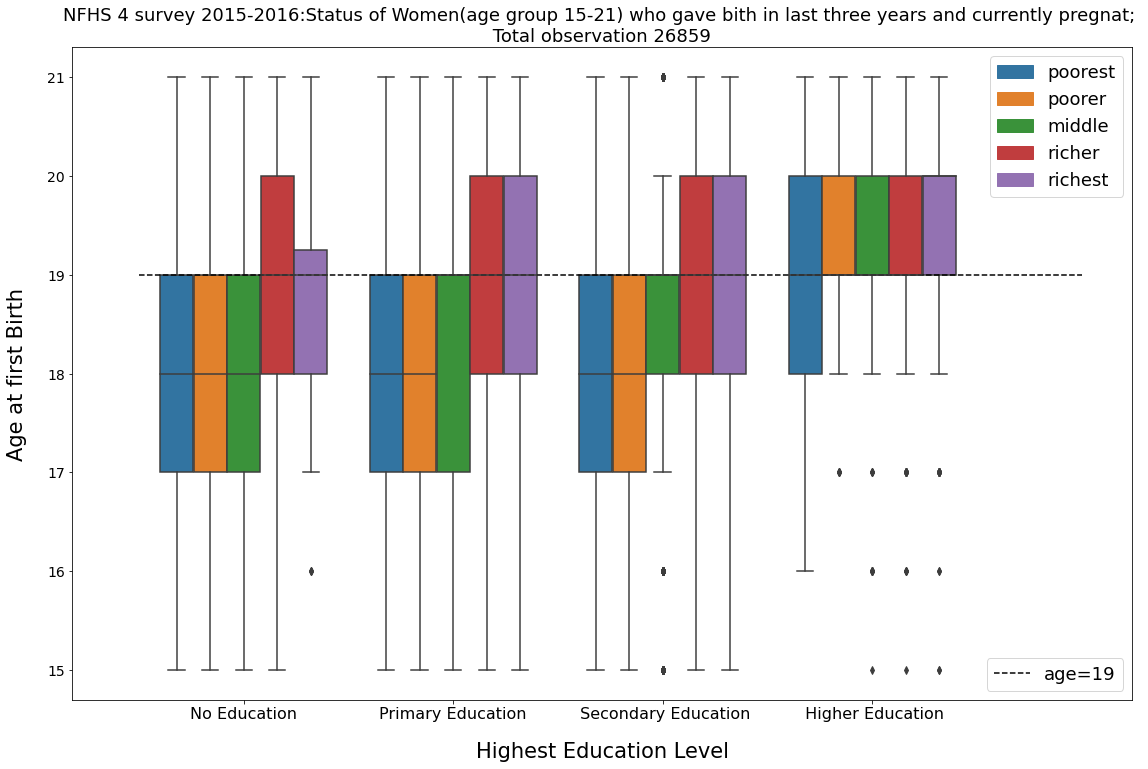

In [97]:
plt.figure(figsize=(19,12))
plot=sns.boxplot(x='v106', y='v212', data=df, hue='v190')

#padded  x-axis label

plt.xlabel("Highest Education Level", fontsize=21, labelpad=20)
plt.ylabel("Age at first Birth", fontsize=21, labelpad=20)
#renaming the axix points
plot.set_xticklabels( ('No Education', 'Primary Education',' Secondary Education',' Higher Education') )
# age=19 line
point1 = [-0.5, 19]
point2 = [4, 19]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
a=plt.plot(x_values, y_values, '-k', linestyle="--", label='age=19')
point1 = [-0.5, 22]
point2 = [4, 22]


#labeling legend with proxy artists 
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.legend(fontsize=18)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

black_line = mlines.Line2D([], [], color='black',
                          markersize=15, label='age=19')
blue_patch = mpatches.Patch(color='#3274a1', label='poorest')
orange_patch = mpatches.Patch(color='#e1812c', label='poorer')
green_patch = mpatches.Patch(color='#3a923a', label='middle')
red_patch = mpatches.Patch(color='#c03d3e', label='richer')
violet_patch = mpatches.Patch(color='#9372b2', label='richest')
first_legend = plt.legend(handles=[ blue_patch, orange_patch, green_patch, red_patch, violet_patch],fontsize=18)
ax = plt.gca().add_artist(first_legend)
plt.title("NFHS 4 survey 2015-2016:Status of Women(age group 15-21) who gave bith in last three years and currently pregnat; \n Total observation 26859 ", fontsize=18)
plt.legend(handles=a, loc=4,fontsize=18 )
plt.show()

# cleaning data

In [100]:
df['v212'].isnull().sum(axis = 0)

6329

In [102]:
# filling missing values in v212 since we are counting pregnat women and women who have given birth in last 3 years:
#in age group of 15-21

In [103]:
df['c212']=df['v212']
df['c212'].fillna(df['v012'],inplace=True)

In [104]:
df['c212'].isnull().sum(axis = 0)

0

In [107]:
df['n106'] = np.where(df['v106'] == 3, 1, 0)

In [105]:
df['n212'] = np.where(df['c212'] >= 19, 1, 0)

In [108]:
df1 = df[['n212', 'n106','v190',]]

In [110]:
df1

,n212,n106,v190
176,1,0,3
203,0,0,3
282,1,0,3
306,0,0,4
312,0,0,3
...,...,...,...
699584,0,0,4
699627,0,0,3
699672,0,0,3
699674,1,0,3


<AxesSubplot:>

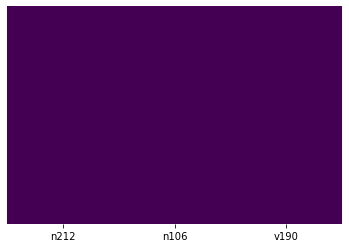

In [111]:
#checking for missing values
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

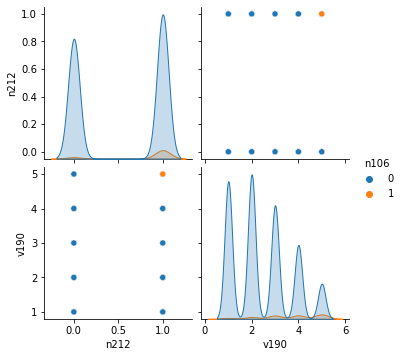

In [114]:
sns.pairplot(df1, hue='n106')

# logistic regression

In [113]:
from sklearn.model_selection import train_test_split
X = df1[['n106','v190']]
y = df1['n212']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# ** Train and fit a logistic regression model on the training set.**

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.51      0.30      0.38      8292
           1       0.58      0.78      0.67     10510

    accuracy                           0.57     18802
   macro avg       0.55      0.54      0.52     18802
weighted avg       0.55      0.57      0.54     18802



In [ ]:
# further analysis will be done to estimate the TFR if females age of leagal marriage is increaed to 21 using Bongaarts model